<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/vadim/UI_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#.init

##utils

In [0]:
import IPython
import uuid
from google.colab import output
from google.colab import files

from __future__ import print_function

from google.colab import widgets
from google.colab import output



# from google.colab import files

def interactive_upload(filetype):
  
  import docx2txt
  
  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs=[]
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text
  
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs
  
  
  
  
class InvokeButton(object):
  def __init__(self, title, callback = None):
    self.title = title
    self.callback = callback

#   def _repr_html_(self):
  def render(self):
    self.callback_id = 'button-' + str(uuid.uuid4())
    if self.callback:
      output.register_callback(self.callback_id, self.callback)

    template =f'''<button style="padding:5px; font-size:16px; margin:15px"  id="{self.callback_id}">{self.title}</button>
        <script>
          document.querySelector("#{self.callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction("{self.callback_id}", [], {{}})
            e.preventDefault();
          }};
        </script>'''
    display(IPython.display.HTML(template))
    
def upload_file_b(tb, type):
  with output.redirect_to_element('#upload_area'): 
  
    print(f'Загрузка документа типа "{type}"')
    print('Select .docx files:')
    uploaded = interactive_upload(type)

#   with tb.output_to(type):
#     for fn in uploaded:
#       print(f'User uploaded file "{fn[0:1000]}" with length {len(fn)} bytes')

def clear_div(elementID):
  display(IPython.display.Javascript(f'document.getElementById("{elementID}").innerHTML = "";'))

def replace_self_elem(elementID, text):
  #print(f'Replace: {elementID}')
  display(IPython.display.Javascript(f'document.getElementById("{elementID}").parentElement.innerHTML = "{text}";'))

def toggle_element(elementId):
  display(IPython.display.Javascript(f''' 
    var x = document.getElementById("{elementId}");
    if (x.style.display === "none")
      x.style.display = "block";
    else
      x.style.display = "none";
    '''))
  
def call_invoke(title, callback):
  with output.redirect_to_element('#items'):    
    InvokeButton(title, callback).render()
    
  clear_div("upload_area")
  
  
GLOBALS__ = {}

#Демо

In [2]:
#@title Настройки { run: "auto", vertical-output: true, display-mode: "form" }
USD_to_RUB = 64.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

{'USD': 64.02, 'RUB': 1.0}


In [3]:
#@title Обработка документов { vertical-output: true, output-height: 800, form-width: "300px", display-mode: "form" }


import os
import sys



def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs


# ====================================
# ====================================
_git_branch = "vadim"  # @param {type:"string"}
# ====================================
# ====================================
 



#''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True


  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


  
  
# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub


def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """



  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo



# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return

  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)

  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']


# AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return

  _init_embedder()# PRECONDITION
  from charter_patterns import CharterPatternFactory 
  from charter_parser import CharterDocumentParser
  CPF = CharterPatternFactory( GLOBALS__[ 'elmo_embedder']  )  
  GLOBALS__['CharterAnlysingContext'] = CharterDocumentParser(CPF)
  print('❤️ DONE initing Charters-related tools and models ')


def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return

  from demo import ContractAnlysingContext
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')
  
  
  
  


# AZ:- THE CODE----------------------------------------------------------------------------------
from typing import List




def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from transaction_values import ValueConstraint

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  from renderer import AbstractRenderer, head_types_colors
  from renderer import to_multicolor_text, as_headline_3, as_offset
  from renderer import as_msg, as_quote
  from renderer import as_error_html
  from transaction_values import ValueConstraint
  from parsing import head_types_dict, head_types

  def _as_smaller(txt):
    return f'<div font-size:12px">{txt}</div>'

  def as_c_quote(txt):
    return f'<div style="margin-top:0.2em; margin-left:2em; font-size:14px">"...{txt} ..."</div>'

  v_color_map = {
    'deal_value_attention_vector': (0.0, 0.5, 1.0),
    'value_attention_vector': (1.0, 0.5, 0.0),
    'd_order_consent': (0.0, 0.3, 0.9),
    'at_x_charity_': (0.0, 1.0, 0.0)
  }

  import numpy as np
  class DemoRenderer(AbstractRenderer):
    
    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))
    
    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = weights.min()
      vmax = weights.max()

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html
    

    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

    ''' AZ:-Rendering CHARITY🔥-----💸------💸-------💸------------------------------'''

    def render_charity_constraints(self, doc, charity_constraints):
      #       html=''
      for head in charity_constraints:
        charity_constraints_by_head = charity_constraints[head]
        display(HTML(as_headline_3(f'{head} ({len(charity_constraints_by_head)})')))
        html = self.html_charity_constraints_by_head(charity_constraints_by_head, doc, head)
        display(HTML(html))

    ''' AZ:------💸------💸-------💸----------------------END--Rendering CHARITY🔥------'''

    def render_subj(self, doc):
      from demo import subject_types_dict
      subj = doc.subject
      s_name = subject_types_dict[subj[0]].upper()

      display(
        HTML(f'Предмет договора:<h3 style="margin:0">{s_name}<sup> {subj[0]}</sup> </h3> confidence:{subj[1]:20,.2f}'))

    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):
      vc = pv.value
      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f} confidence={pv.confidence:20,.2f}</b> '

    def render_contents(self, doc):
      html =  as_headline_3('Выявленное Содержание документа')
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))
      

    def render_sections(self, sections):
      from legal_docs import HeadlineMeta
      html = as_headline_3('Выявленное секции документа')
      html += "<ul>"
      for section_type in sections:
        section: HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))

    def render_values(self, values):
      if len(values) > 0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))

    

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4)
        
      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label=vector_name.upper(),
              alpha=0.9, color='black')
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                                value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'{ as_headline_3(headline)} <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = np.min(weights)
      vmax = np.max(weights)

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html

    def render_charter_parsing_results(self, doc, org, rz, charity_constraints):

      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])
  
      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(doc, rz, charity_constraints)
  
      display(HTML(html))

    def _render_sentence(self, sentence):
  
      html = ""
      constraints: List[ValueConstraint] = sentence['constraints']
      html += "<br>"
      for probable_v in constraints:
        html += self.value_to_html(probable_v.value)
  
      if len(constraints) > 0:
        html += '<div style="border-bottom:1px solid #ccc; margin-top:1em"></div>'
        section = sentence['subdoc']
        #         html += "TODO:"#self.to_color_text(section.tokens, section.distances_per_pattern_dict['deal_value_attention_vector'])
  
        v = {
          'deal_value_attention_vector': section.distances_per_pattern_dict['deal_value_attention_vector'],
          'value_attention_vector': section.distances_per_pattern_dict['value_attention_vector'],
          'd_order_consent': section.distances_per_pattern_dict['d_order_consent']
        }
        min_color = (0.3, 0.3, 0.33)
        html += as_c_quote(to_multicolor_text(section.tokens_cc, v, v_color_map, min_color=min_color, _slice=None))
  
      return html

    def render_constraint_values(self, doc, rz, charity_constraints):
  
      html = ''
      for head_type in rz.keys():
  
        r_by_head_type = rz[head_type]
  
        html += '<hr style="margin-top: 45px">'
  
        html += f'<h2 style="color:{head_types_colors[head_type]}; padding:0; margin:0">{head_types_dict[head_type]}</h2>'
  
        sentences = r_by_head_type['sentences']
        html += as_quote(r_by_head_type['caption'])
  
        charity_constraints_by_head = charity_constraints[head_type]
        html_i = ''
        html_i += self.html_charity_constraints_by_head(charity_constraints_by_head, doc, head_type)
  
        if True:
          html_i += as_headline_3('решения о пороговых суммах:')
  
          if len(sentences) > 0:
            for sentence in sentences:
              html_i += self._render_sentence(sentence)
  
          else:
            html_i += as_error_html('Пороговые суммы не найдены или не заданы')
  
        html += as_offset(html_i)
  
      return html

    

    ''' AZ:-Rendering CHARITY🔥-----💸------💸-------💸------------------------------'''

     

    def html_charity_constraints_by_head(self, charity_constraints_by_head, doc, head) -> str:
      html = ''

      html += as_headline_3('одобрение сделок Благотворительности:')
      if len(charity_constraints_by_head) > 0:
        for _slice, _confidence, _sum in charity_constraints_by_head:
          html += '<BR>'
          _slice_post = slice(_slice.stop, _slice.stop + 80)
          _slice_pre = slice(_slice.start - 40, _slice.start)
          subdoc = doc.sections[head].body

          v = {
            'at_x_charity_': subdoc.distances_per_pattern_dict['$at_x_charity_'],
            'deal_value_attention_vector': subdoc.distances_per_pattern_dict['deal_value_attention_vector'],
            'd_order_consent': subdoc.distances_per_pattern_dict['d_order_consent']
          }

          min_color = (0.3, 0.3, 0.33)
          q_html = ''
          #         q_html += _as_smaller(to_multicolor_text(subdoc.tokens_cc, v, v_color_map, min_color=min_color, _slice=_slice_pre))
          q_html += to_multicolor_text(subdoc.tokens_cc, v, v_color_map, min_color=min_color, _slice=_slice)
          #         q_html += _as_smaller(to_multicolor_text(subdoc.tokens_cc, v, v_color_map, min_color=min_color, _slice=_slice_post))
          html += as_c_quote(q_html)
      else:
        html += as_msg('не выявлено')

      return html
       

  GLOBALS__['renderer'] = DemoRenderer()

  
  # AZ:----------PROTOCOLS RENDERER-------------------------

  from legal_docs import LegalDocument

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  from renderer import  as_headline_3
  class ProtocolRenderer(DemoRenderer):

    def winning_patterns_to_html(self, _tokens, ranges, winning_patterns, _range,
                                 colormaps=['Reds', 'Purples', 'Blues', 'Greens', 'Greys']):
      vmin = -ranges[1]
      vmax = -ranges[0]

      #     print("winning_patterns_to_html _range", _range, "min max=", ranges)

      norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

      cmaps = []

      #     print (colormaps)
      for n in colormaps:
        cmap = mpl.cm.get_cmap(n)
        cmaps.append(cmap)

      html = ""

      for d in _range:
        winning_pattern_i = winning_patterns[d][0]
        colormap = cmaps[winning_pattern_i % len(colormaps)]
        normed = norm(-winning_patterns[d][1])
        color = mpl.colors.to_hex(colormap(normed))
        html += '<span title="' + '{} {:.2f}'.format(d, winning_patterns[d][
          1]) + '" style="background-color:' + color + '">' + str(
          _tokens[d]) + " </span>"
        if _tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_doc_subject_fragments(self, doc):
      #     print(doc.per_subject_distances)

      _html = ""
      if doc.per_subject_distances is not None:

        type = "Договор  благотворительного пожертвования"
        if doc.per_subject_distances[0] > doc.per_subject_distances[1]:
          type = "Договор возмездного оказания услуг"

        _html += "<h3>" + type + "</h3>"

        colormaps = ['PuRd'] * 5 + ['Blues'] * 7 + ['Greys']

        _html += as_headline_4('Предмет договора')

        for region in [doc.subj_range]:
          _html += self.winning_patterns_to_html(_tokens=doc.tokens, ranges=doc.subj_ranges,
                                                 winning_patterns=doc.winning_subj_patterns, _range=region,
                                                 colormaps=colormaps)

      return _html

    def render_subject(self, counter):
      html = as_headline_3('Предмет документа (X):') + self.subject_type_weights_to_html(counter)
      display(HTML(html))

    def print_results(self, _doc: LegalDocument, results=None):

      if results is None:
        results = _doc.found_sum

      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(_doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(_doc.tokens[start:end], _doc.sums[start:end])

    def subject_type_weights_to_html(self, counter):
      dict = {
        't_dea': 'Сделка',
        't_cha': 'Благотворительность',
        't_org': 'Организационные решения'
      }

      maxkey = "None"
      for key in dict:
        if counter[key] > counter[maxkey]:
          maxkey = key

      html = ""
      for key in dict:
        templ = "<div>{}: {}</div>"
        if key == maxkey:
          templ = '<b style="font-size:135%; color:maroon">{}: {}</b>'
        html += templ.format(counter[key], dict[key])

      return html

  GLOBALS__['ProtocolRenderer'] = ProtocolRenderer()
  
  from demo_protocols import ProtocolAnlysingContext
  GLOBALS__['ProtocolAnlysingContext'] = ProtocolAnlysingContext(GLOBALS__['elmo_embedder'],
                                                                 GLOBALS__['ProtocolRenderer'])
  GLOBALS__['_init_the_code'] = True
    # AZ:-------------------------------------------------Init Protocols context===
  

  # AZ:-------------------------------------------------Init Charters context====

  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text

  GLOBALS__['read_doc'] = read_doc

  print("❤️ DONE initializing the code")


# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from demo import ContractAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context.tokens, best_value.value.context.attention, _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)


#   display(HTML(renderer.render_constraint_values(charter_constraints)))


# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

W0423 06:53:21.808558 140167149295488 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

👌 code already imported from GitHub!
👌 Embedder is already created! 
👌 Code is alredy imported!
👌 Charters-related tools are already inited 
👌 Contracts-related tools are already inited 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

См. следующие табы✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please select "Устав, он лег спать" .docx file:


Saving ГПН Устав.docx to ГПН Устав (1).docx
User uploaded file "ГПН Устав.docx" with length 77192 bytes
Символов в оригинальном документе: 52465
Embedding region: 0 7200
🐌 Embedding 7200 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0423 07:00:04.665812 140167149295488 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 7200, 1024)
Function _emb called 6 times. 
Execution time max: 20.1671, average: 10.9308
Function _embedd_large called 1 times. 
Execution time max: 26.3543, average: 26.3543
Function calculate_distances_per_pattern called 47 times. 
Execution time max: 2.8695, average: 0.3574
Embedding region: 6000 1929
🐌 Embedding 1929 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0423 07:00:24.821395 140167149295488 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 1929, 1024)
Function _emb called 7 times. 
Execution time max: 20.1671, average: 10.5423
Function _embedd_large called 1 times. 
Execution time max: 26.3543, average: 26.3543
Function calculate_distances_per_pattern called 47 times. 
Execution time max: 2.8695, average: 0.3574
Function _emb called 7 times. 
Execution time max: 20.1671, average: 10.5423
Function _embedd_large called 2 times. 
Execution time max: 28.3914, average: 27.3728
Function calculate_distances_per_pattern called 47 times. 
Execution time max: 2.8695, average: 0.3574
----------------- LegalDocument charter deleted. Ciao bella!
----------------- LegalDocument charter.name deleted. Ciao bella!
----------------- LegalDocument charter.name deleted. Ciao bella!
----------------- LegalDocument charter.head.all deleted. Ciao bella!
----------------- LegalDocument charter.head.all deleted. Ciao bella!
----------------- LegalDocument charter.head.directors deleted. Ciao bella!
-------

Устав: сделано✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please select "Протокол" .docx file:


Saving ГПН 2 Протокол СД (к-п недвиж НПр).docx to ГПН 2 Протокол СД (к-п недвиж НПр).docx
User uploaded file "ГПН 2 Протокол СД (к-п недвиж НПр).docx" with length 26416 bytes
Символов в оригинальном документе: 3671
ProtocolDocument text: len(3671)
----------------- LegalDocument legal_doc deleted. Ciao bella!
🐌 Embedding 684 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0423 07:02:44.983864 140167149295488 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 684, 1024)
3038
clean-up ------------- 🐌 -SLEEP: give it a time
❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.13.1
Function _emb called 10 times. 
Execution time max: 21.8693, average: 11.0637
Function _embedd_large called 2 times. 
Execution time max: 28.3914, average: 27.3728
Function calculate_distances_per_pattern called 94 times. 
Execution time max: 2.8897, average: 0.3531
❤️ ACCOMPLISHED: 	 0.	 Document embedded into ELMO space


nlp_tools/patterns.py:185: RuntimeWarning: All-NaN slice encountered
  min = np.nanmin(b)
nlp_tools/patterns.py:186: RuntimeWarning: All-NaN slice encountered
  max = np.nanmax(b)
nlp_tools/patterns.py:187: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(b)
nlp_tools/demo_protocols.py:303: RuntimeWarning: All-NaN slice encountered
  dist_per_pat.append(np.nanmin(row))


❤️ ACCOMPLISHED: 	 1.	 value found


Протокол: сделано✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please select "Договор" .docx file:


Saving ГПН 3 Договор пожертвования 21.02.2019.doc to ГПН 3 Договор пожертвования 21.02.2019.doc
User uploaded file "ГПН 3 Договор пожертвования 21.02.2019.doc" with length 51712 bytes
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f78fae52f48>)
Символов в оригинальном документе: 7200
----------------- LegalDocument legal_doc deleted. Ciao bella!
----------------- LegalDocument legal_doc.contract deleted. Ciao bella!
----------------- LegalDocument legal_doc.contract deleted. Ciao bella!
----------------- LegalDocument legal_doc.subj deleted. Ciao bella!
----------------- LegalDocument legal_doc.subj deleted. Ciao bella!
----------------- LegalDocument legal_doc.price. deleted. Ciao bella!
----------------- LegalDocument legal_doc.price. deleted. Ciao bella!
----------------- LegalDocument legal_doc.resp deleted. Ciao bella!
----------------- LegalDocument legal_doc.resp deleted. Ciao bella!
--------

I0423 07:06:08.842144 140167149295488 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 1120, 1024)
Function _emb called 11 times. 
Execution time max: 21.8693, average: 11.1162
Function _embedd_large called 2 times. 
Execution time max: 28.3914, average: 27.3728
Function calculate_distances_per_pattern called 94 times. 
Execution time max: 2.8897, average: 0.3531
⚠️ WARNING: - Раздел про стоимость сделки не найден!
- Ищем стоимость в разделе 1. ПРЕДМЕТ ДОГОВОРА.
alt price section DOC --------------------


❤️ ACCOMPLISHED: 	 1.	 searching for transaction values in section  "1. ПРЕДМЕТ ДОГОВОРА."
❤️ ACCOMPLISHED: 	 2.	 fetching transaction values


Recent parsing warnings:
		 ⚠️ WARNING: - Раздел про стоимость сделки не найден!


Договор: сделано✓


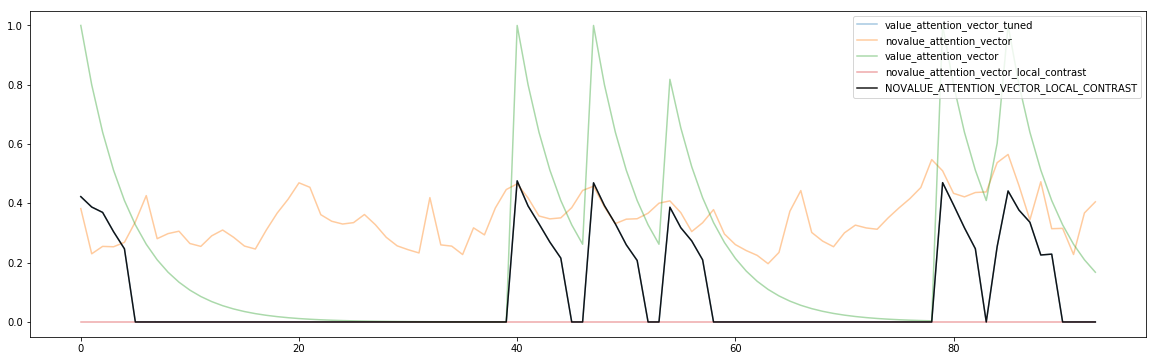

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
#@title Обработка документов { vertical-output: true, output-height: 800, display-mode: "form" }

# VI: @artifex from here:
import traceback

def process_charter():
  uploaded = interactive_upload('Устав, он лег спать')
  try:

    _CTX = GLOBALS__['CharterAnlysingContext']
    _CTX.verbosity_level=2
    _CTX.analyze_charter(uploaded[0], True)


    GLOBALS__['renderer'].render_charter_parsing_results(_CTX.doc, _CTX.org, _CTX.constraints, _CTX.charity_constraints)
    GLOBALS__['renderer'].render_contents(_CTX.doc)
  except Exception as e:
    print(f"💥\033[1;31mОшибка:{e}\033[1;0m")
    print(traceback.format_exc())

def process_contract():
  uploaded = interactive_upload('Договор')

  try:
    GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])
    doc = GLOBALS__['ContractAnlysingContext'].contract

    GLOBALS__['renderer'].render_subj(doc)
    GLOBALS__['renderer'].render_contents(doc)
  except Exception as e:
    print(f"💥\033[1;31mОшибка:{e}\033[1;0m")
    print(traceback.format_exc())

  
def start_wizard(tb):
  def step1():
    with tb.output_to(0):
      print(f"\033[1;32mСм. следующие табы\u2713")
    
    with tb.output_to(1):
      tb.clear_tab()
      b2.render()

  def step2():
    with tb.output_to(1):      
      tb.clear_tab()
      process_charter() 
      
      print(f"\033[1;32mУстав: сделано\u2713")  
      b2.render()
    
    with tb.output_to(2):
      tb.clear_tab()
      b3.render()

  def step3():    
    with tb.output_to(2):
      tb.clear_tab()
      process_contract()
      
      print(f"\033[1;32mДоговор: сделано\u2713")  
      b3.render()
    
    with tb.output_to(3):
      tb.clear_tab()
      b4.render()

  need_protocol = True  
  found_violations = False
  def step4():
    with tb.output_to(3):
      tb.clear_tab()      
      find_and_show_violations()
      if 'need_protocol' in GLOBALS__: 
        need_protocol = True
      
      print(f"\033[1;32mПроверка нарушений: сделано\u2713")  
      b4.render()
    
    with tb.output_to(4):
      tb.clear_tab()
      b5.render()
      b6.render()
      
  def step5():
    with tb.output_to(4):
      tb.clear_tab()
      uploaded = interactive_upload('Протокол')
      try:
        GLOBALS__['ProtocolAnlysingContext'].process(uploaded[0])        
      except:
        print(f"💥\033[1;31mОшибка:{sys.exc_info()}\033[1;0m")
        print(traceback.format_exc())
        
      print(f"\033[1;32mПротокол: сделано\u2713")  
      b5.render()
      b6.render()
      
      
  def without_protocol_step5():
    with tb.output_to(4):
      tb.clear_tab()
      print("❌\033[1;31mНарушение: протокол отсутствует!\033[1;0m")
      b5.render()
      b6.render()
    
    
                                     
  b1 = InvokeButton('Начнём', step1)
  b2 = InvokeButton('Устав...', step2)
  b3 = InvokeButton('Договор...', step3)
  b4 = InvokeButton('Искать нарушения...', step4)
  b5 = InvokeButton('Протокол...', step5)

  b6 = InvokeButton('Протокол отсутствует', without_protocol_step5)
    
  
  with tb.output_to(0): 
    try:     
      
      ## do preparation here   
      # 1.
      _init_import_code_from_gh()
      # 2.
      _init_embedder()
      # 3.
      _init_the_code()
      # 4.
      _init_charters()
      # 5.
      _init_contracts()

      b1.render()
    except:
      print(f"💥\033[1;31mОшибка:{sys.exc_info()}\033[1;0m")
      print(traceback.format_exc())


#@title Wizard2
tb2 = widgets.TabBar(['Начало', 'Устав', 'Договор', 'Поиск нарушений', 'Протокол'], location='top')    
start_wizard(tb2)